Started working on 28-12-2024

Status : done

Accuracy : 84%

What is purpose of this?
from the provided features we can predict that if the student is in depression or not

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("hopesb/student-depression-dataset")

# print("Path to dataset files:", path)

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
df.dropna(inplace=True)
df.drop("id", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  object 
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  object 
 10  Dietary Habits                         27898 non-null  object 
 11  Degree 

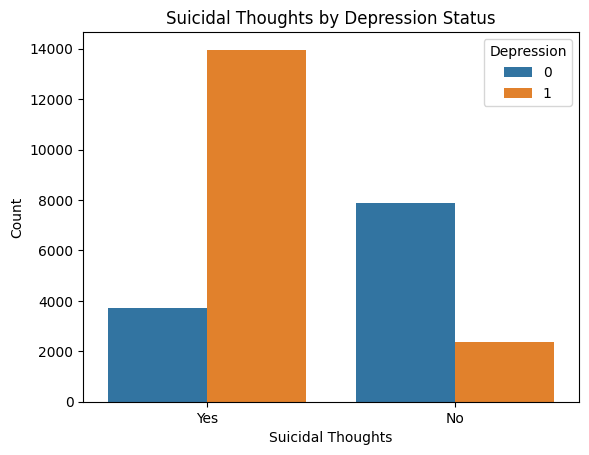

In [7]:
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df)
plt.title('Suicidal Thoughts by Depression Status')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()


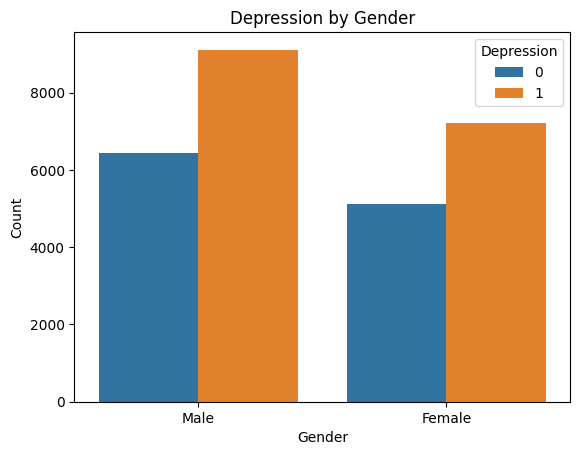

In [8]:
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()


C:\Users\Madhav\AppData\Local\Temp\ipykernel_459016\1623640507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_depression.index, y=correlation_with_depression.values, palette='coolwarm')


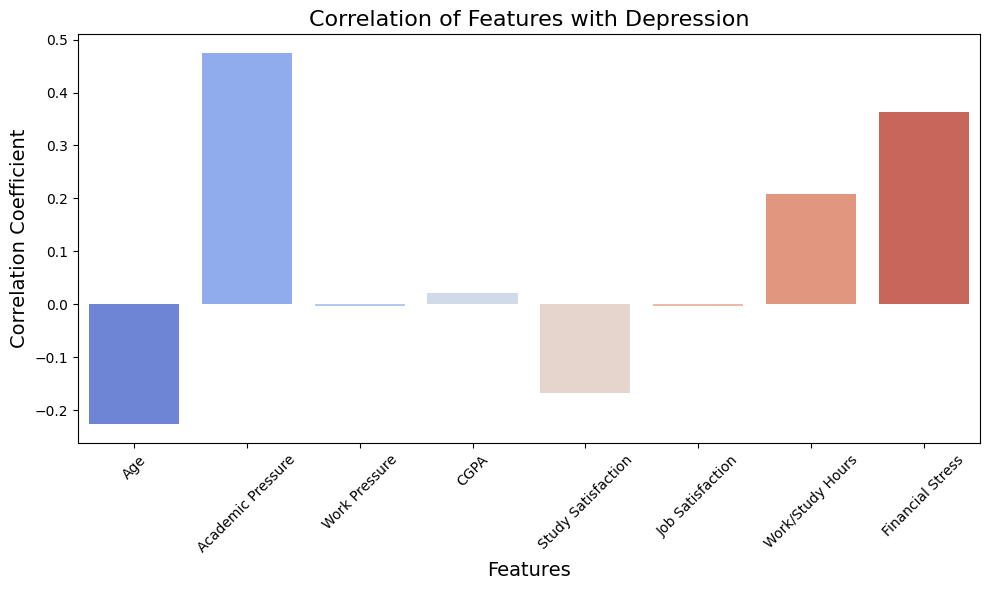

In [9]:
# Select numerical columns (correlation works only with numeric data)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation with 'Depression'
correlation_with_depression = df[numerical_cols].corr()['Depression'].drop('Depression')

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_depression.index, y=correlation_with_depression.values, palette='coolwarm')
plt.title('Correlation of Features with Depression', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col, df[col].unique())

Gender ['Male' 'Female']
City ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Sleep Duration ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Dietary Habits ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Degree ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.P

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoders = {}

# Encoding object columns
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int64  
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  int64  
 3   Profession                             27898 non-null  int64  
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  int64  
 10  Dietary Habits                         27898 non-null  int64  
 11  Degree 

In [14]:
df.describe()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,0.557244,25.822174,26.294107,10.993763,3.141336,0.000430,7.656160,2.943974,0.000681,1.511506,1.465804,10.915872,0.632877,7.156570,3.139867,0.483942,0.585526
std,0.496721,4.905651,16.356151,0.244003,1.381462,0.043994,1.470708,1.361122,0.044397,1.063102,1.239674,7.235735,0.482029,3.707598,1.437347,0.499751,0.492640
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,21.000000,14.000000,11.000000,2.000000,0.000000,6.290000,2.000000,0.000000,1.000000,0.000000,5.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,1.000000,25.000000,24.000000,11.000000,3.000000,0.000000,7.770000,3.000000,0.000000,2.000000,1.000000,11.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,30.000000,44.000000,11.000000,4.000000,0.000000,8.920000,4.000000,0.000000,2.000000,3.000000,16.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,59.000000,51.000000,13.000000,5.000000,5.000000,10.000000,5.000000,4.000000,4.000000,3.000000,27.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [15]:
X = df.drop("Depression", axis=1)
y = df["Depression"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, r2_score

In [18]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Accuracy: 0.8446236559139785
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.84      0.84      0.84      5580

R2 Score: 0.3624946236105723


e:\Software\Anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Accuracy: 0.8367383512544803
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2348
           1       0.84      0.88      0.86      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580

R2 Score: 0.3301414095838885


In [20]:
# SVC
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Accuracy: 0.8415770609318997
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      2348
           1       0.84      0.90      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580

R2 Score: 0.34999451819117167


In [21]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = SVC(probability=True)

ensemble = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('svc', model3)], voting='hard')

ensemble.fit(X_train, y_train)

accuracy = ensemble.score(X_test, y_test)
print(accuracy)

e:\Software\Anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8444444444444444


In [22]:
import pickle

In [23]:
# with open('model.pkl','wb') as f:
#     pickle.dump(ensemble,f)

In [24]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [25]:
# with open('labelEncoder.pkl','wb') as f:
#     pickle.dump(encoders,f)

In [26]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Fit the logistic regression model using gradient descent.

        Parameters:
        - X: A numpy array of shape (m, n) where m is the number of examples and n is the number of features.
        - y: A numpy array of shape (m,) containing the binary target values (0 or 1).
        """
        m, n = X.shape

        # Initialize parameters
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradient descent
        for i in range(self.num_iterations):
            # Linear model: z = Xw + b
            z = np.dot(X, self.weights) + self.bias

            # Apply sigmoid function to get probabilities
            predictions = self.sigmoid(z)

            # Compute gradients
            error = predictions - y
            dw = (1 / m) * np.dot(X.T, error)
            db = (1 / m) * np.sum(error)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Optionally print the loss every 100 iterations for debugging
            if self.verbose and i % 100 == 0:
                loss = - (1 / m) * np.sum(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
                print(f"Iteration {i}: Loss {loss}")

    def predict_proba(self, X):
        """
        Predict probabilities using the logistic regression model.

        Parameters:
        - X: A numpy array of shape (m, n).

        Returns:
        - A numpy array of probabilities of shape (m,).
        """
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X):
        """
        Predict binary labels (0 or 1) using the logistic regression model.

        Parameters:
        - X: A numpy array of shape (m, n).

        Returns:
        - A numpy array of predicted labels of shape (m,).
        """
        probabilities = self.predict_proba(X)
        return np.where(probabilities >= 0.5, 1, 0)

# Generate a simple dataset
np.random.seed(42)
m = 100  # number of samples
n = 2    # number of features

# Random feature matrix
X = np.random.randn(m, n)

# Create a linear combination with noise and threshold to create binary labels
true_weights = np.array([2, -3.5])
true_bias = 0.5
linear_combination = np.dot(X, true_weights) + true_bias
probabilities = 1 / (1 + np.exp(-linear_combination))
y = (probabilities > 0.5).astype(int)

# Initialize and train logistic regression model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000, verbose=True)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)
for i in range(len(preds)):
    print(f"Prediction: {preds[i]}, True Label: {y_test.iloc[i]}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Iteration 0: Loss 0.6931471805599435


Iteration 100: Loss 2.8576572991108886
Iteration 200: Loss 6.394788667989733
Iteration 300: Loss 7.304447475512622
Iteration 400: Loss 6.830210746154741
Iteration 500: Loss 6.34135364857531
Iteration 600: Loss 5.877458682508669
Iteration 700: Loss 5.478623324796948
Iteration 800: Loss 5.166747196203814
Iteration 900: Loss 4.952174165197631
Prediction: 0, True Label: 1
Prediction: 1, True Label: 0
Prediction: 0, True Label: 1
Prediction: 1, True Label: 1
Prediction: 0, True Label: 1
Prediction: 0, True Label: 1
Prediction: 0, True Label: 0
Prediction: 0, True Label: 0
Prediction: 0, True Label: 0
Prediction: 0, True Label: 1
Prediction: 0, True Label: 1
Prediction: 0, True Label: 0
Prediction: 0, True Label: 0
Prediction: 0, True Label: 1
Prediction: 0, True Label: 0
Prediction: 0, True Label: 0
Prediction: 1, True Label: 1
Prediction: 1, True Label: 1
Prediction: 1, True Label: 1
Prediction: 0, True Label: 1
Prediction: 1, True Label: 1
Prediction: 0, True Label: 0
Prediction: 0, True 

In [30]:
def compute_learning_curve(X, y, train_sizes, n_iter=10, base_random_state=42):
    train_errors = []
    test_errors = []
    # For each fraction of data as training set
    for train_size in train_sizes:
        train_acc = []
        test_acc = []
        # Do several iterations to average out randomness
        for i in range(n_iter):
            # Vary random_state for each iteration
            rs = base_random_state + i
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, train_size=train_size, random_state=rs)
            # Create and train logistic regression
            model = LogisticRegression(solver='liblinear')
            model.fit(X_train, y_train)
            # Compute accuracies
            train_acc.append(accuracy_score(y_train, model.predict(X_train)))
            test_acc.append(accuracy_score(y_test, model.predict(X_test)))
        # Error = 1 - accuracy
        train_errors.append(1 - np.mean(train_acc))
        test_errors.append(1 - np.mean(test_acc))
    return train_errors, test_errors

# Generate synthetic dataset (binary classification)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

# Define a range of training set sizes (fractions)
train_sizes = np.linspace(0.1, 0.9, 9)

# Compute learning curve data
train_errors, test_errors = compute_learning_curve(X, y, train_sizes)

NameError: name 'make_classification' is not defined

In [ ]:
# overfitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_errors, marker='o', label='Training Error')
plt.plot(train_sizes, test_errors, marker='s', label='Test Error')
plt.xlabel('Training Set Size (fraction)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Bias vs Variance in Logistic Regression (Learning Curve)')
plt.legend()
plt.show()

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

R2 Score: 1.0


In [ ]:
# underfitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Accuracy: 0.7888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        43
           1       0.78      0.83      0.80        47

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

R2 Score: 0.1538842157347846


e:\Software\Anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

R2 Score: 1.0


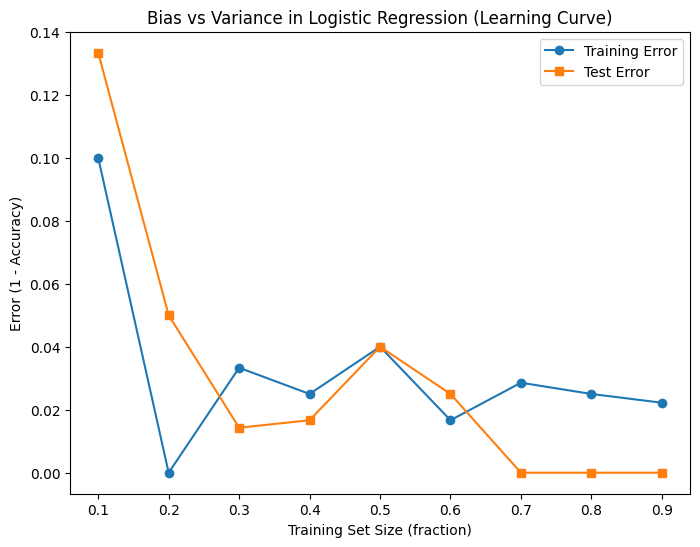

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  # For demo purposes; replace with your data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score


###############################################
# Part 1: Fixed Train/Test Split and Metrics
###############################################

# Use a 90/10 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train Logistic Regression on the fixed split
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

###############################################
# Part 2: Learning Curve for Bias vs Variance
###############################################

# Define a range of training set sizes (fractions of the entire dataset)
train_sizes = np.linspace(0.1, 0.9, 9)
train_errors = []
test_errors = []

# For each fraction, perform a train/test split and compute errors
for train_size in train_sizes:
    X_train_lc, X_test_lc, y_train_lc, y_test_lc = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # Train the logistic regression model
    lc_model = LogisticRegression(max_iter=10000)
    lc_model.fit(X_train_lc, y_train_lc)
    
    # Calculate training and test accuracies
    train_acc = accuracy_score(y_train_lc, lc_model.predict(X_train_lc))
    test_acc = accuracy_score(y_test_lc, lc_model.predict(X_test_lc))
    
    # Append errors (1 - accuracy)
    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_errors, marker='o', label='Training Error')
plt.plot(train_sizes, test_errors, marker='s', label='Test Error')
plt.xlabel('Training Set Size (fraction)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Bias vs Variance in Logistic Regression (Learning Curve)')
plt.legend()
plt.show()


e:\Software\Anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        43
           1       0.78      0.83      0.80        47

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

R2 Score: 0.1538842157347846


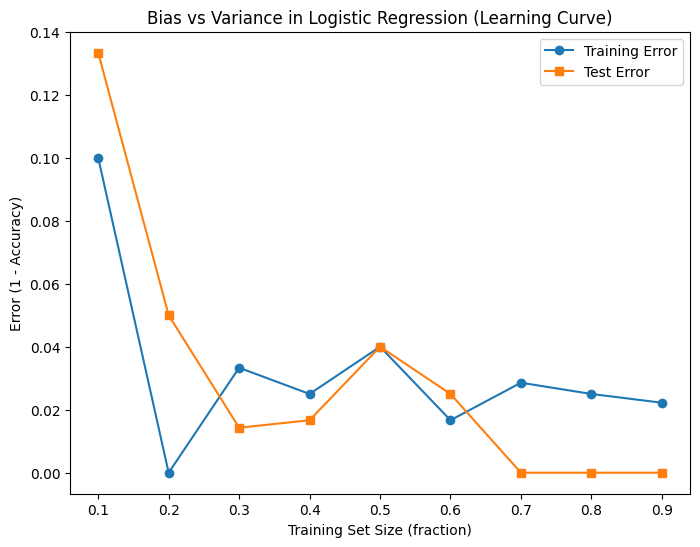

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  # For demo purposes; replace with your data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score


###############################################
# Part 1: Fixed Train/Test Split and Metrics
###############################################

# Use a 90/10 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Train Logistic Regression on the fixed split
model = LogisticRegression(max_iter=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

###############################################
# Part 2: Learning Curve for Bias vs Variance
###############################################

# Define a range of training set sizes (fractions of the entire dataset)
train_sizes = np.linspace(0.1, 0.9, 9)
train_errors = []
test_errors = []

# For each fraction, perform a train/test split and compute errors
for train_size in train_sizes:
    X_train_lc, X_test_lc, y_train_lc, y_test_lc = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # Train the logistic regression model
    lc_model = LogisticRegression(max_iter=10000)
    lc_model.fit(X_train_lc, y_train_lc)
    
    # Calculate training and test accuracies
    train_acc = accuracy_score(y_train_lc, lc_model.predict(X_train_lc))
    test_acc = accuracy_score(y_test_lc, lc_model.predict(X_test_lc))
    
    # Append errors (1 - accuracy)
    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_errors, marker='o', label='Training Error')
plt.plot(train_sizes, test_errors, marker='s', label='Test Error')
plt.xlabel('Training Set Size (fraction)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Bias vs Variance in Logistic Regression (Learning Curve)')
plt.legend()
plt.show()
